In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout,Conv2D,MaxPool2D
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv('c:/Users/jadha/Data/age_gender.csv')
df.shape

(23705, 5)

In [4]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.pixels=df.pixels.apply(lambda x: np.array(x.split(),'int32').reshape(48,48))

In [6]:
df.gender=df.gender.apply(lambda x: 'Male' if x==0 else 'Female' )

In [8]:
def show_images(rows,cols):
    plt.figure(figsize=[rows*3,cols*3])
    for i in range (1,rows*cols+1):
        plt.subplot(rows,cols,i)
        k=np.random.randint(0,23705)
        px=df.pixels[k]
        plt.imshow(px,cmap='gray')
        plt.title(f"Age:{df.age[k]}  Gender :{df.gender[k]} \n race : {df.race[k]}",color='b')
        plt.axis('off')
    plt.tight_layout()

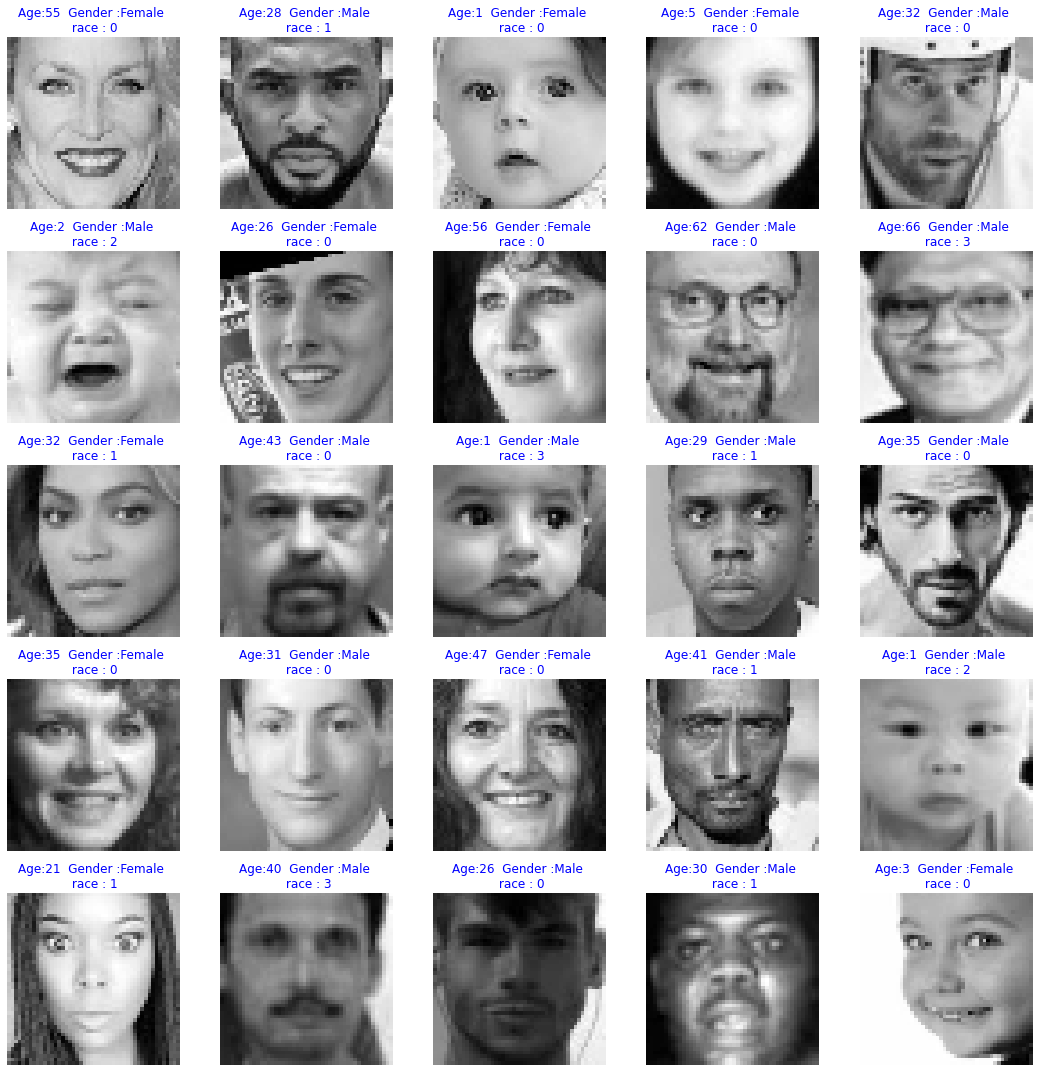

In [9]:
show_images(5,5)

In [10]:
x=np.zeros((23705,48,48))
x[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for i in range (23705):
    x[i]=df.pixels[i]/255

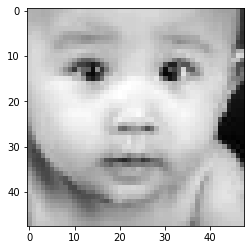

In [12]:
plt.imshow(x[0],cmap='gray')
plt.show()

In [13]:
y=df['gender']
y.shape

(23705,)

In [14]:
y=pd.get_dummies(y)
y.shape

(23705, 2)

In [15]:
model =Sequential()

#convolution and maxpoollayer
model.add(Conv2D(filters=32,kernel_size=3,
                 strides=1,padding='same',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))


model.add(Conv2D(filters=64,kernel_size=3,
                 strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))


model.add(Conv2D(filters=132,kernel_size=3,
                 strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))

#flatten layer
model.add(Flatten())

#hidden layer
model.add(Dense(64))
model.add(Activation('relu'))

#output layer
model.add(Dense(2))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [16]:
132*64*9+132

76164

In [17]:
64*4752+64

304192

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2000,random_state=10)

In [20]:
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
340/340 [==============================] - 45s 129ms/step - loss: 0.4309 - accuracy: 0.7953 - val_loss: 0.3142 - val_accuracy: 0.8615
Epoch 2/5
340/340 [==============================] - 44s 128ms/step - loss: 0.2946 - accuracy: 0.8725 - val_loss: 0.2702 - val_accuracy: 0.8855
Epoch 3/5
340/340 [==============================] - 44s 131ms/step - loss: 0.2561 - accuracy: 0.8896 - val_loss: 0.2475 - val_accuracy: 0.8900
Epoch 4/5
340/340 [==============================] - 43s 127ms/step - loss: 0.2255 - accuracy: 0.9055 - val_loss: 0.2439 - val_accuracy: 0.8940
Epoch 5/5
340/340 [==============================] - 45s 133ms/step - loss: 0.2066 - accuracy: 0.9141 - val_loss: 0.2314 - val_accuracy: 0.9090


In [22]:
model.evaluate(x_train,y_train)

679/679 [==============================] - 12s 18ms/step - loss: 0.1720 - accuracy: 0.9332


[0.17201489210128784, 0.9332411885261536]

In [23]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 23ms/step - loss: 0.2314 - accuracy: 0.9090


[0.23136809468269348, 0.9089999794960022]

In [24]:
y_predict=np.array([np.argmax(i) for i in model.predict(x_test)])
y_predict

63/63 [==============================] - 2s 23ms/step


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
y_actual=np.array([np.argmax(i) for i in y_test.values])
y_actual

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

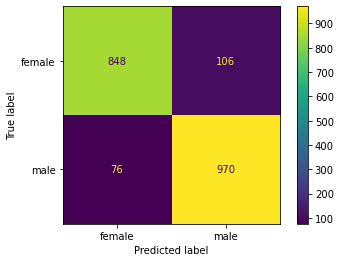

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_actual,y_predict)
cm_disp=ConfusionMatrixDisplay(cm,display_labels=['female','male'])
cm_disp.plot()
plt.show()

In [27]:
k=np.random.randint(0,2000)
x_test[k].shape

(48, 48)

1/1 [==============================] - 0s 116ms/step


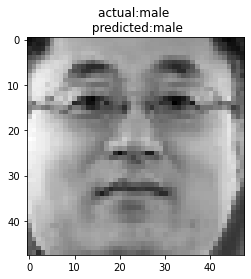

In [28]:
k=np.random.randint(0,2000)
pridiction1=model.predict(x_test[k].reshape(1,48,48,1))
# pridiction1
pridiction1=np.argmax(pridiction1)
pridiction1

actual=np.argmax(y_test.values[k])

# pridiction1,actual


genders=['female','male']
plt.imshow(x_test[k],cmap='gray')
plt.title(f'actual:{genders[actual]} \n predicted:{genders[pridiction1]}')
plt.show()

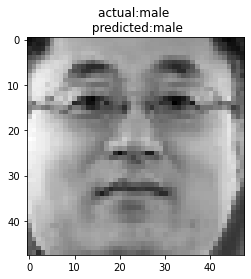

In [29]:
genders=['female','male']
plt.imshow(x_test[k],cmap='gray')
plt.title(f'actual:{genders[actual]} \n predicted:{genders[pridiction1]}')
plt.show()